### Naive first order $P_N$

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import scipy.io
import os
from util import *

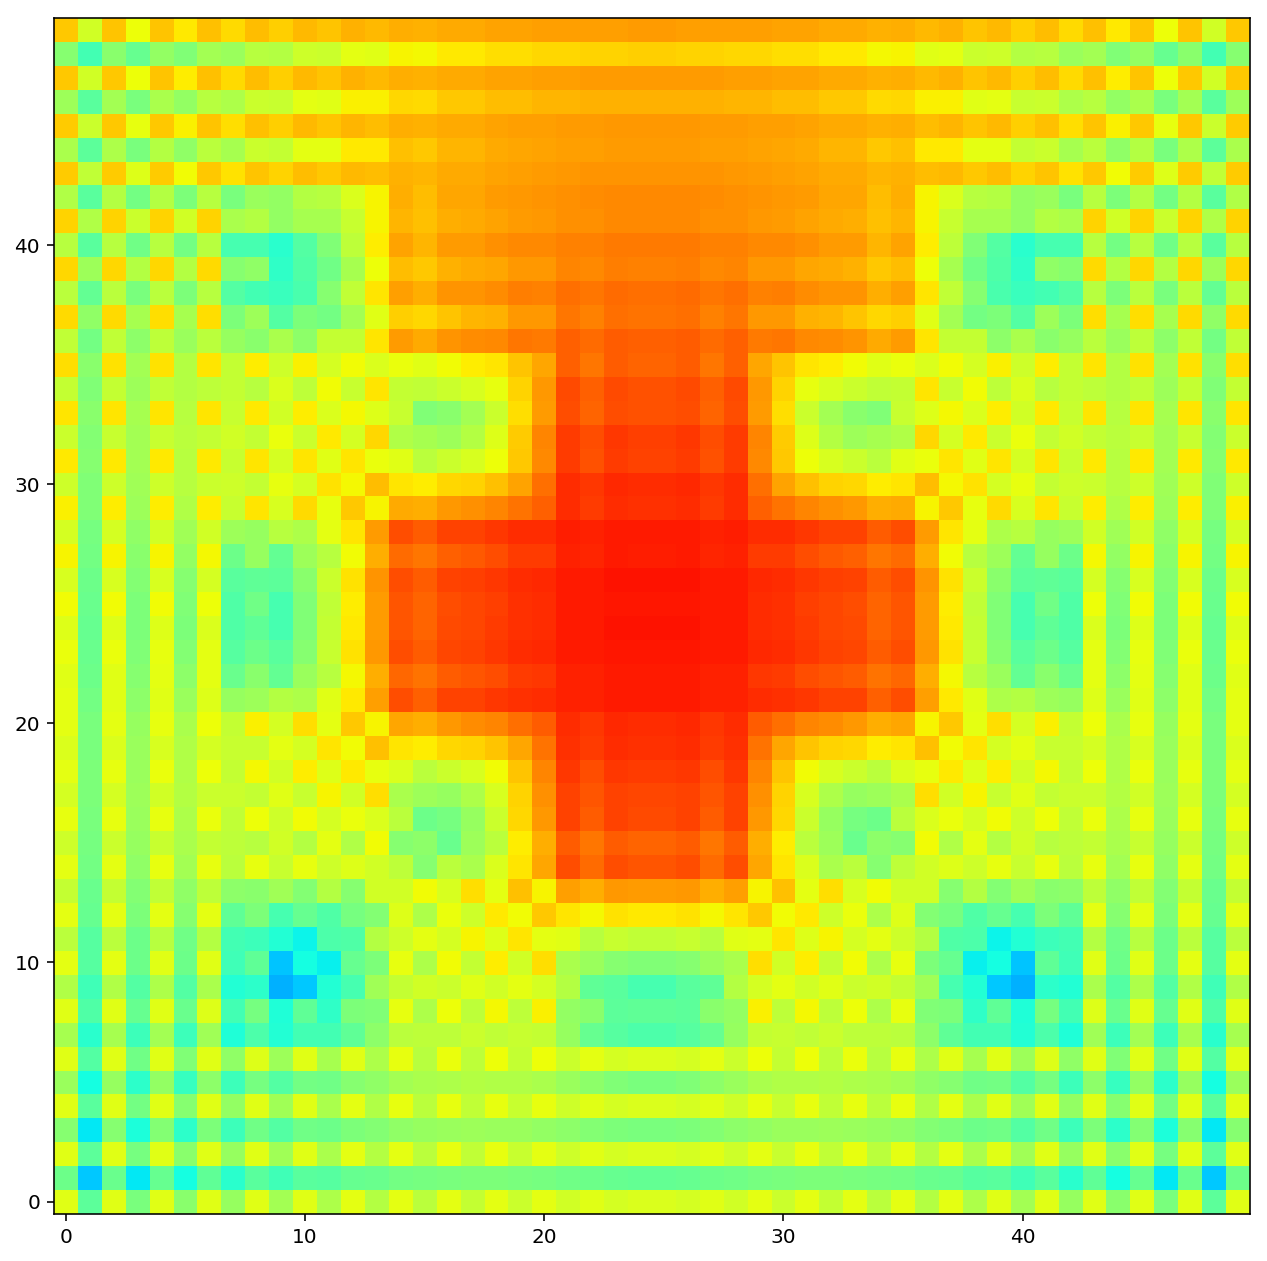

In [22]:


domain = Domain2D(7.0, 50)
numVoxels = domain.res_x*domain.res_y
numCoeffs = 3

# load solution from starmap solver for validation
#solv_U = scipy.io.loadmat("C:/projects/epfl/epfl17/python/simplepn/x.mat")["x"]
x = scipy.io.loadmat("C:/projects/epfl/epfl17/python/simplepn/x.mat")["x"]

u0 = np.zeros( (domain.res_x, domain.res_y) )

def get_global_index( voxel_i, voxel_j, coeff ):
    '''Returns the equation index for the given h coeffient at the given voxel.'''
    voxel = voxel_j*domain.res_x + voxel_i
    return voxel*numCoeffs + coeff

for voxel_i in range(domain.res_y):
    for voxel_j in range(domain.res_x):
        i = get_global_index(voxel_i, voxel_j, 0)
        u0[voxel_i, voxel_j] = x[i]
        
u0 = np.abs(u0)
        
        
#starmap_U[starmap_U <= 1.0e-20] = 1.0e-20
#our_u[our_u <= 1.0e-20] = 1.0e-20
vmin = 1.0e-8
vmax = np.max(u0)*10.1

fig = plt.figure(figsize=(11, 11))
#plt.subplot(221)
#plt.title('python implementation of starmap')
#, extent = [domain.bound_min[0], domain.bound_max[0], domain.bound_min[1], domain.bound_max[1]]
plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')
#plt.subplot(222)
#plt.title('starmap')
#plt.imshow(starmap_U.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower', extent = [domain.bound_min[0], domain.bound_max[0], domain.bound_min[1], domain.bound_max[1]])
#plt.suptitle('solution for coefficient c={}'.format(c)); 
plt.show()

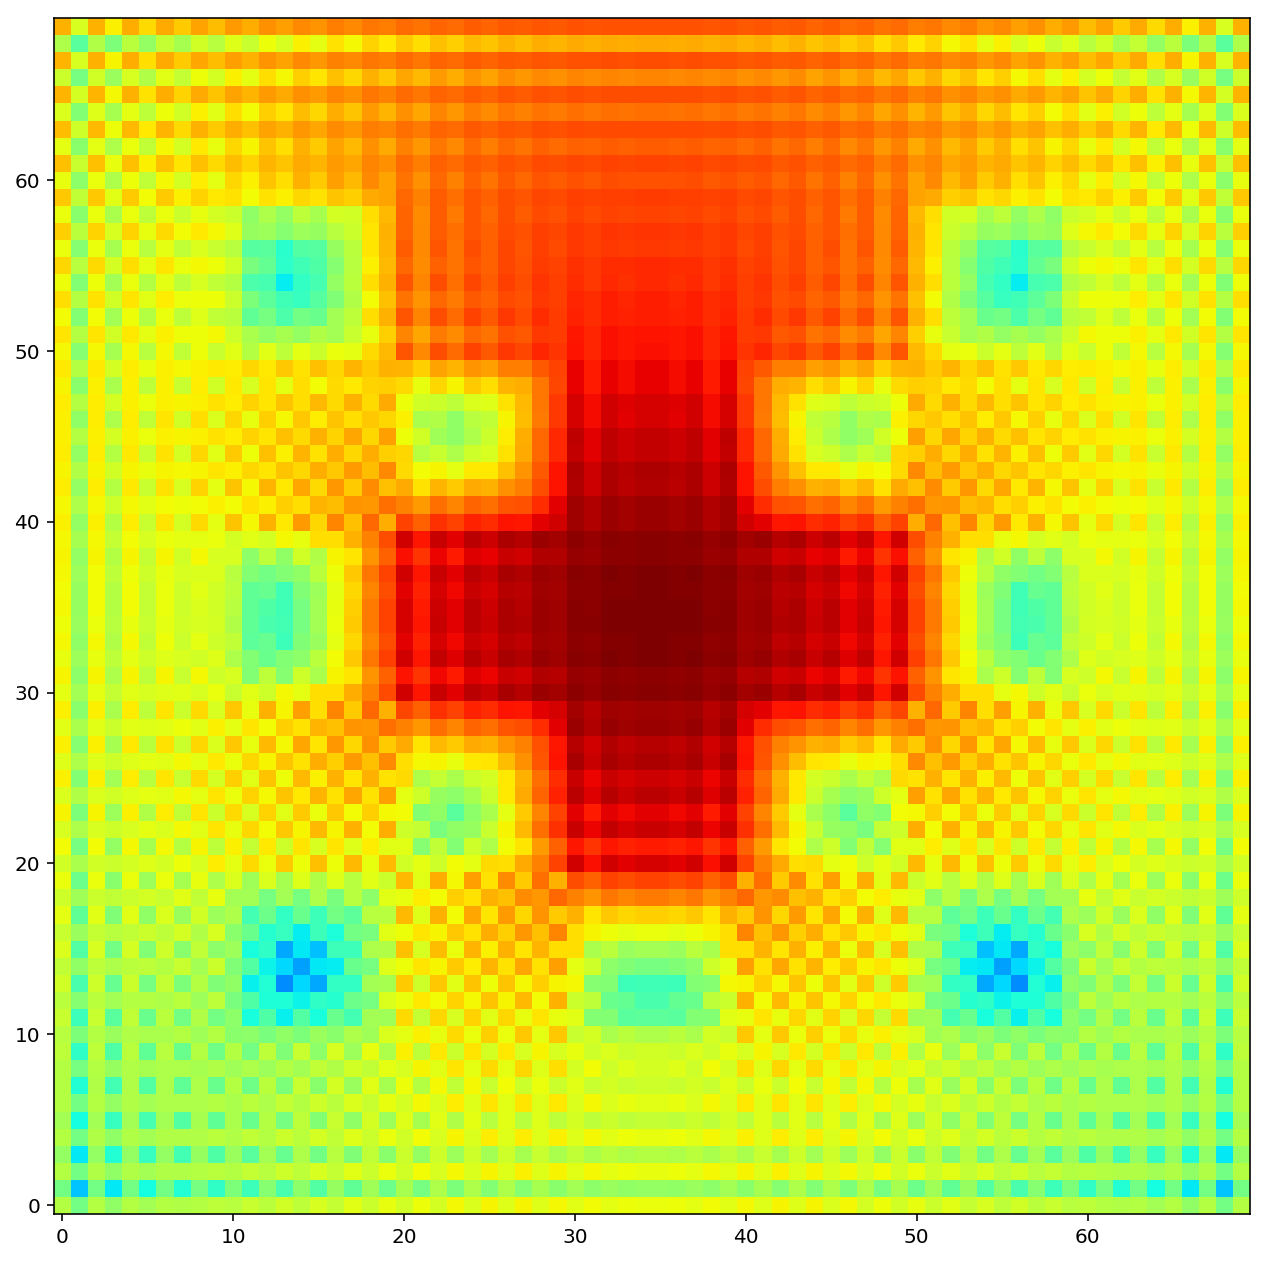

In [23]:

domain = Domain2D(7.0, 70)
numVoxels = domain.res_x*domain.res_y
numCoeffs = 3

# load solution from starmap solver for validation
#solv_U = scipy.io.loadmat("C:/projects/epfl/epfl17/python/simplepn/x.mat")["x"]
x = scipy.io.loadmat("C:/projects/epfl/epfl17/python/simplepn/x.mat")["x"]

u0 = np.zeros( (domain.res_x, domain.res_y) )

def get_global_index( voxel_i, voxel_j, coeff ):
    '''Returns the equation index for the given h coeffient at the given voxel.'''
    voxel = voxel_j*domain.res_x + voxel_i
    return voxel*numCoeffs + coeff

for voxel_i in range(domain.res_y):
    for voxel_j in range(domain.res_x):
        i = get_global_index(voxel_i, voxel_j, 0)
        u0[voxel_i, voxel_j] = x[i]
        
u0 = np.abs(u0)
        
        
#starmap_U[starmap_U <= 1.0e-20] = 1.0e-20
#our_u[our_u <= 1.0e-20] = 1.0e-20
vmin = 1.0e-8
vmax = np.max(u0)*1.0

fig = plt.figure(figsize=(11, 11))
#plt.subplot(221)
#plt.title('python implementation of starmap')
#, extent = [domain.bound_min[0], domain.bound_max[0], domain.bound_min[1], domain.bound_max[1]]
plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')
#plt.subplot(222)
#plt.title('starmap')
#plt.imshow(starmap_U.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower', extent = [domain.bound_min[0], domain.bound_max[0], domain.bound_min[1], domain.bound_max[1]])
#plt.suptitle('solution for coefficient c={}'.format(c)); 
plt.show()

------------------------------------------

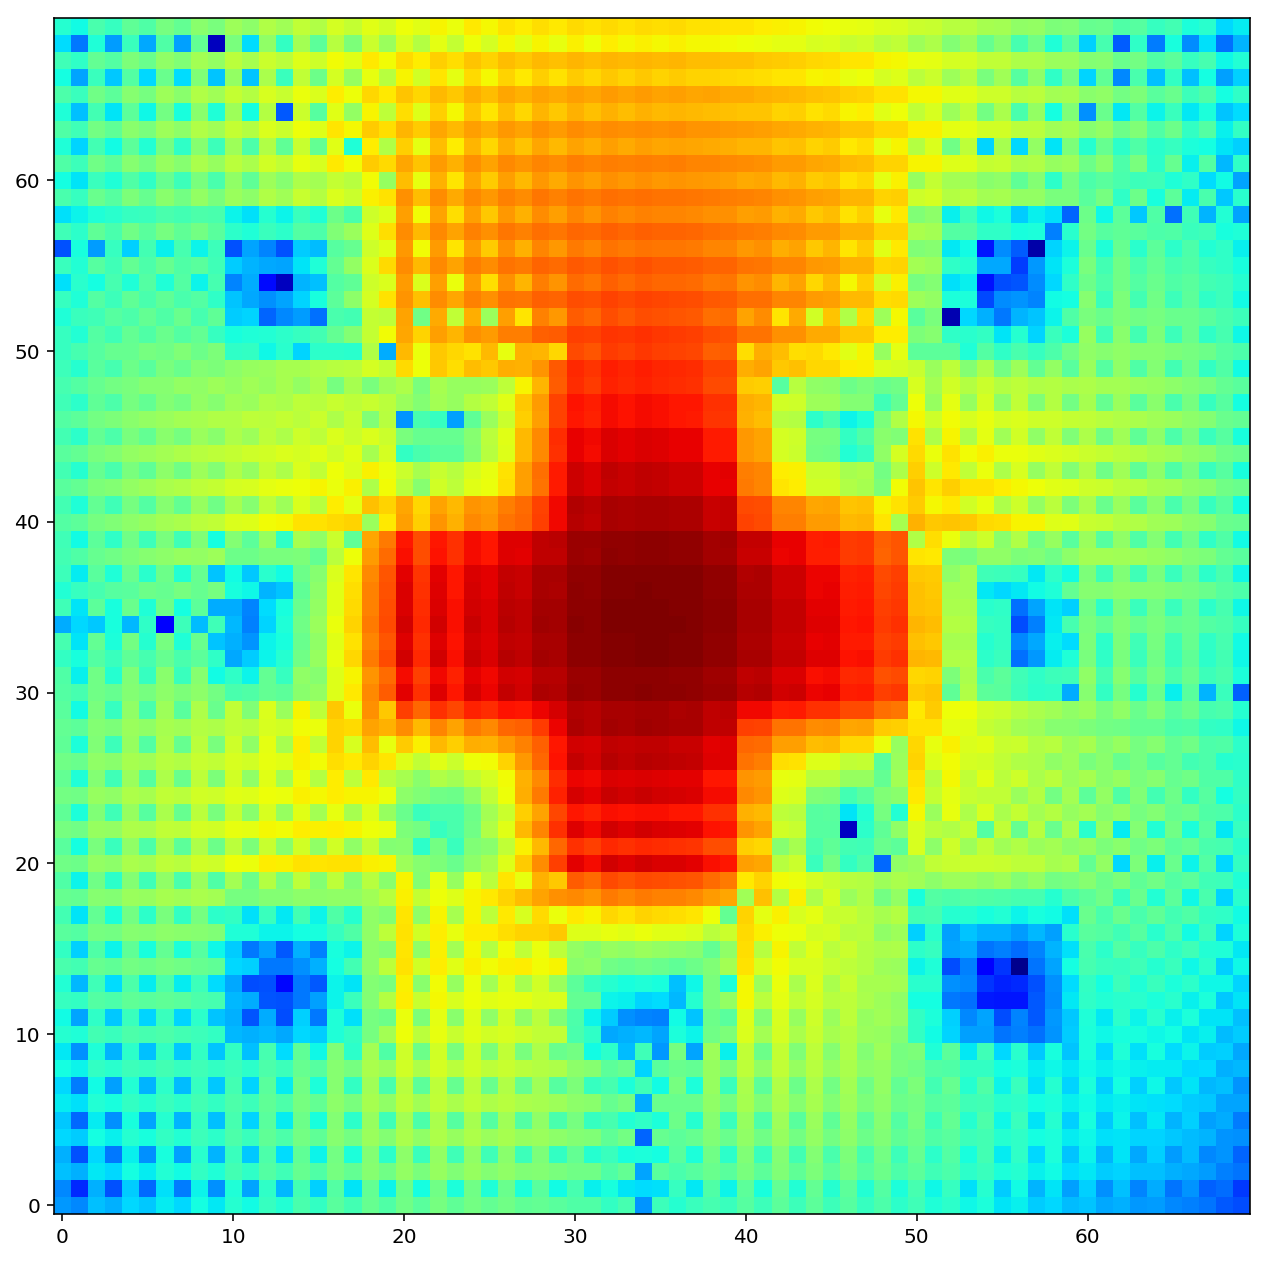

In [3]:
domain = Domain2D(7.0, 70)
numVoxels = domain.res_x*domain.res_y
numCoeffs = 3

# load solution from starmap solver for validation
x = scipy.io.loadmat("C:/projects/epfl/epfl17/python/sopn/x.mat")["x"]




In [16]:
u0 = np.zeros( (domain.res_x, domain.res_y) )

def get_global_index( voxel_i, voxel_j, coeff ):
    '''Returns the equation index for the given h coeffient at the given voxel.'''
    voxel = voxel_j*domain.res_x + voxel_i
    return voxel*numCoeffs + coeff

for voxel_i in range(domain.res_y):
    for voxel_j in range(domain.res_x):
        i = get_global_index(voxel_i, voxel_j, 0)
        value = x[i]
        #if abs(value) < 0.0:
        #    value = 0.00001
        u0[voxel_i, voxel_j] = value
        
u0 = np.abs(u0)
        
        
vmin = 1.0e-8
vmax = np.max(u0)*1.0


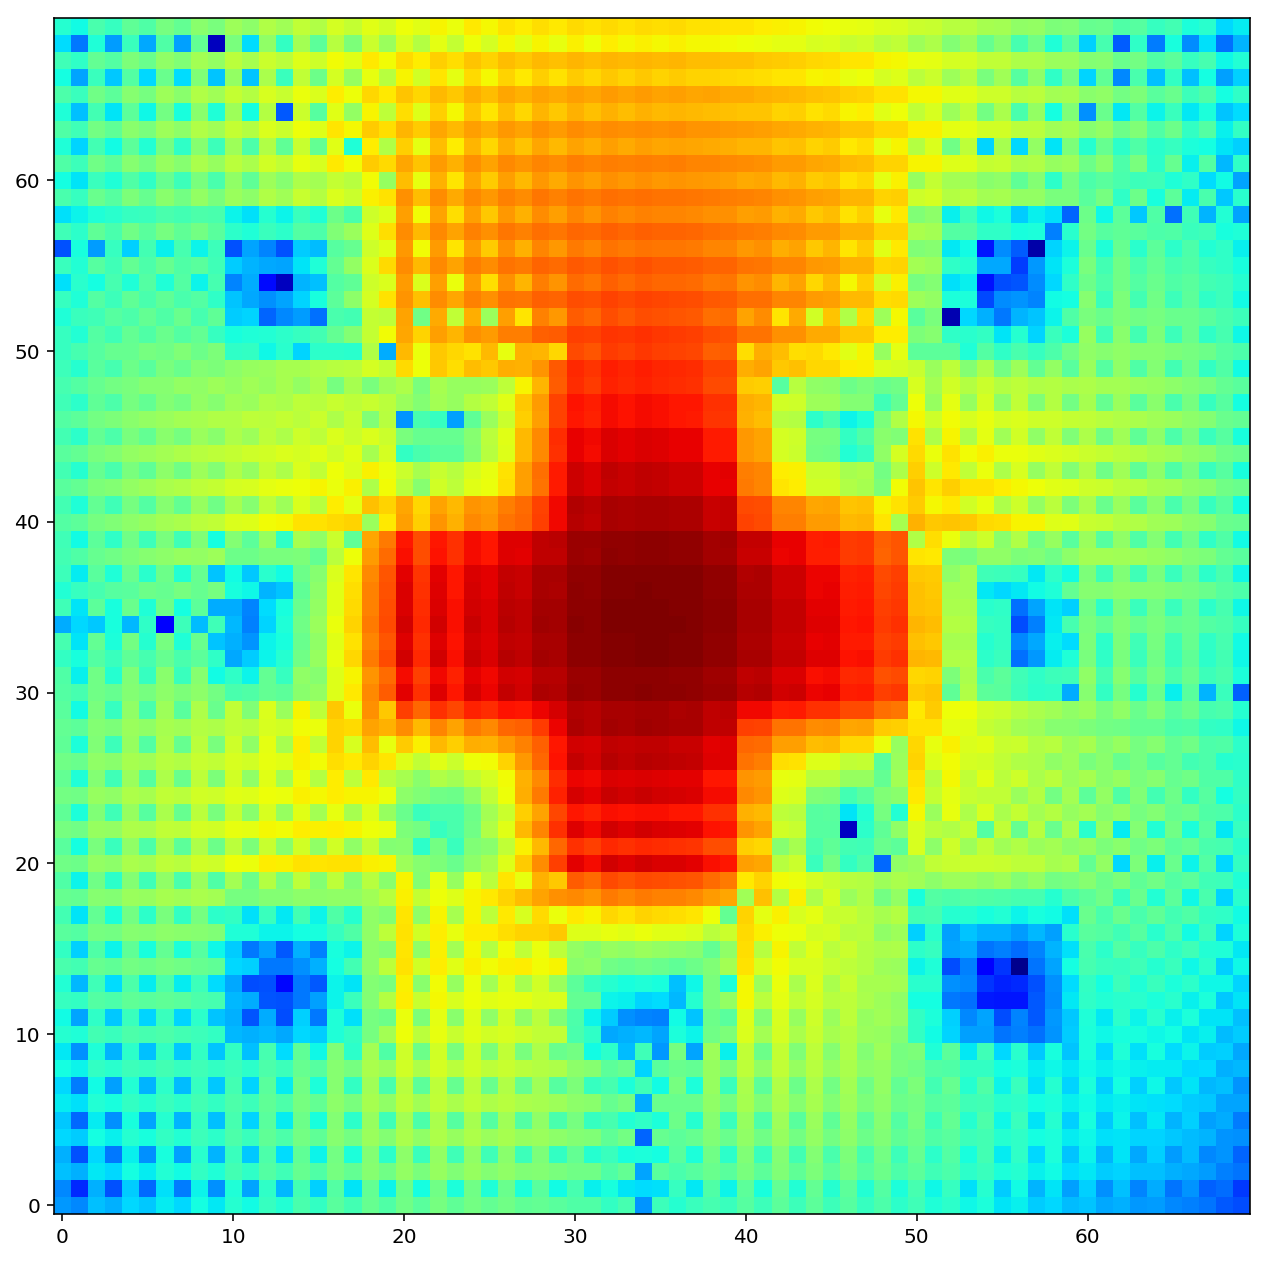

In [17]:
fig = plt.figure(figsize=(11, 11))
plt.imshow(u0.T, interpolation="nearest", cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax), origin='lower')
plt.show()

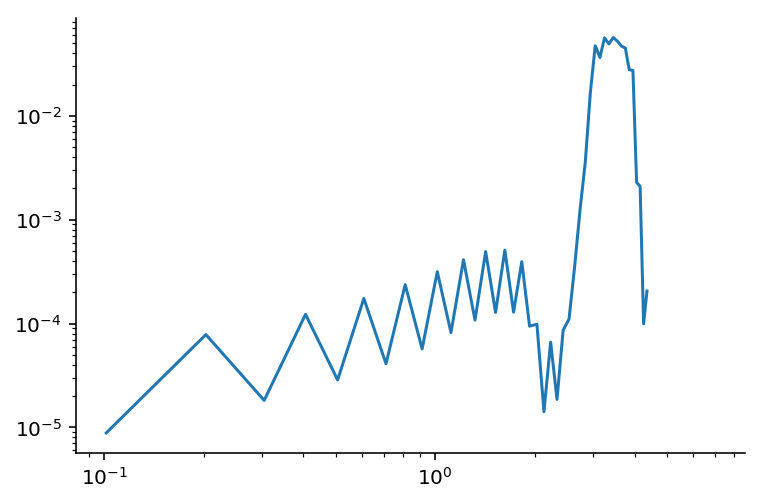

In [15]:
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.tick_params(axis='both', direction='out')
ax.get_xaxis().tick_bottom()   # remove unneeded ticks 
ax.get_yaxis().tick_left()
#plt.ylim([10.0e-2,10.0e1])

x_list = np.linspace(0.0, 7.0, domain.res_x)
value_list = np.zeros(domain.res_x)
voxel_j = 21
for voxel_i in range(domain.res_x):
    global_i = get_global_index(voxel_i, voxel_j, 0)
    value_list[voxel_i] = x[global_i]
    
plt.loglog( x_list, value_list )
    


#plt.loglog( domain_x[center_voxel[0], center_voxel[1]:], phi[center_voxel[0], center_voxel[1]:], label="solution", color = 'g', linestyle=' ', marker='.', markersize=5 )
#plt.loglog( domain_x[center_voxel[0], center_voxel[1]:], phi_groundtruth[center_voxel[0], center_voxel[1]:], label="groundtruth", color = 'g' )
#plt.title("reflected point light in vacuum (2d)")
#plt.xlabel(r'$r \left[m\right]$', fontsize=18)
#plt.ylabel(r'$\phi \left[\frac{W}{m}\right]$', fontsize=18)
#plt.grid(True, linestyle='-',color='0.75')
#plt.legend(loc='best')


plt.show()